# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Satya Bintang E R
- **Email:** satyabintang10@gmail.com
- **ID Dicoding:** satchh

## Menentukan Pertanyaan Bisnis

- Bagaimana perubahan nilai PM2.5 rata-rata harian pada 5 distrik utama selama 6 bulan terakhir, dan distrik mana yang mengalami peningkatan tertinggi?
- Apakah terdapat hubungan signifikan antara tingkat kelembaban dan kenaikan PM10 selama periode Januari–Desember 2016 dan berapa besar kontribusi kelembaban terhadap variasi PM10?


## Import Semua Packages/Library yang Digunakan

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import numpy as np

## Data Wrangling

### Gathering Data

In [ ]:
import zipfile
import os

zip_file_path = '/content/Air-quality-dataset.zip'
extraction_path = 'extracted_files'

# Buat direktori tujuan jika belum ada
os.makedirs(extraction_path, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

print(f"File '{zip_file_path}' berhasil diekstrak ke '{extraction_path}'")

# Verifikasi isi folder yang diekstrak
print("Isi folder hasil ekstraksi:")
for root, dirs, files in os.walk(extraction_path):
    level = root.replace(extraction_path, '').count(os.sep)
    indent = ' ' * 4 * (level)
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 4 * (level + 1)
    for f in files:
        print(f'{subindent}{f}')

File '/content/Air-quality-dataset.zip' berhasil diekstrak ke 'extracted_files'
Isi folder hasil ekstraksi:
extracted_files/
    PRSA_Data_20130301-20170228/
        PRSA_Data_Changping_20130301-20170228.csv
        PRSA_Data_Tiantan_20130301-20170228.csv
        PRSA_Data_Guanyuan_20130301-20170228.csv
        PRSA_Data_Wanliu_20130301-20170228.csv
        PRSA_Data_Huairou_20130301-20170228.csv
        PRSA_Data_Aotizhongxin_20130301-20170228.csv
        PRSA_Data_Dingling_20130301-20170228.csv
        PRSA_Data_Dongsi_20130301-20170228.csv
        PRSA_Data_Wanshouxigong_20130301-20170228.csv
        PRSA_Data_Nongzhanguan_20130301-20170228.csv
        PRSA_Data_Shunyi_20130301-20170228.csv
        PRSA_Data_Gucheng_20130301-20170228.csv


In [ ]:
import glob
import os
import pandas as pd

# Path ke subfolder tempat file diekstrak
folder_path = "extracted_files/PRSA_Data_20130301-20170228"

# Mencari semua file CSV dalam subfolder
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# Menampilkan daftar file CSV
print("Daftar file CSV dalam folder:")
for file in csv_files:
    print("-", os.path.basename(file))

# List untuk menyimpan semua DataFrame
all_dfs = []

# Membaca setiap file CSV dan menambahkannya ke list
for file in csv_files:
    try:
        df = pd.read_csv(file)
        # Ekstrak nama stasiun dari nama file
        station_name = os.path.basename(file).replace("PRSA_Data_", "").replace("_20130301-20170228.csv", "")
        df['station'] = station_name
        all_dfs.append(df)
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Menggabungkan semua DataFrame menjadi satu
if all_dfs:
    final_df = pd.concat(all_dfs, ignore_index=True)
    print(f"Berhasil menggabungkan {len(all_dfs)} file menjadi satu DataFrame dengan {final_df.shape[0]} baris dan {final_df.shape[1]} kolom.")
else:
    print("Tidak ada file CSV yang ditemukan atau dibaca.")
    final_df = pd.DataFrame() # Buat DataFrame kosong jika tidak ada data


Daftar file CSV dalam folder:
- PRSA_Data_Changping_20130301-20170228.csv
- PRSA_Data_Tiantan_20130301-20170228.csv
- PRSA_Data_Guanyuan_20130301-20170228.csv
- PRSA_Data_Wanliu_20130301-20170228.csv
- PRSA_Data_Huairou_20130301-20170228.csv
- PRSA_Data_Aotizhongxin_20130301-20170228.csv
- PRSA_Data_Dingling_20130301-20170228.csv
- PRSA_Data_Dongsi_20130301-20170228.csv
- PRSA_Data_Wanshouxigong_20130301-20170228.csv
- PRSA_Data_Nongzhanguan_20130301-20170228.csv
- PRSA_Data_Shunyi_20130301-20170228.csv
- PRSA_Data_Gucheng_20130301-20170228.csv
Berhasil menggabungkan 12 file menjadi satu DataFrame dengan 420768 baris dan 18 kolom.


**Insight:**
- Mengekstrak zip yang berisi beberapa data file csv
- Mengimpor dan membaca beberapa file csv tersebut
- Menyatukan beberapa file csv tersebut menjadi satu file untuk memudahkan analisis

## Assessing Data

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


## Interpretasi Hasil Assessing Data

Berdasarkan hasil pemeriksaan awal dataset, diperoleh informasi sebagai berikut:

* Dataset memiliki **420.768 baris** dan **18 kolom**.
* Kolom-kolom **numerik utama**:
  - `PM2.5`: 412.029 non-null → terdapat beberapa nilai hilang (~2% data).
  - `PM10`: 414.319 non-null → sedikit nilai hilang.
  - `SO2`: 411.747 non-null → beberapa missing values.
  - `NO2`: 408.652 non-null → terdapat missing values.
  - `CO`: 400.067 non-null → missing values cukup signifikan.
  - `O3`: 407.491 non-null → ada beberapa missing values.
  - `TEMP`, `PRES`, `DEWP`, `RAIN`, `WSPM`: hampir lengkap, masing-masing memiliki sedikit missing values.
* Kolom **categorical / object**:
  - `wd` (arah angin): 418.946 non-null → ada beberapa data hilang.
  - `station`: 420.768 non-null → lengkap, tidak ada missing values.
* Kolom waktu:
  - `year`, `month`, `day`, `hour`: lengkap, tidak ada missing values.

### Insight:
1. Beberapa kolom polutan (`PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, `O3`) memiliki nilai hilang yang perlu **ditangani** sebelum analisis lebih lanjut, baik dengan imputasi atau penghapusan baris.
2. Kolom **waktu** dan **stasiun** lengkap → memungkinkan analisis tren waktu dan perbandingan antar stasiun.
3. Secara keseluruhan, dataset cukup lengkap dan **layak untuk analisis**, namun perlu perhatian pada kolom polutan dengan missing values.


### Cleaning Data

In [ ]:
# Menghapus spasi dari nama kolom (jika ada)
df.columns = df.columns.str.strip()
final_df.dropna(inplace=True)

**Insight:**
- Melakukan pengecekan data yang kosong
- Menghapus nilai yang kosong ( NaN ) untuk membuat data yang bersih

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 382168 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       382168 non-null  int64  
 1   year     382168 non-null  int64  
 2   month    382168 non-null  int64  
 3   day      382168 non-null  int64  
 4   hour     382168 non-null  int64  
 5   PM2.5    382168 non-null  float64
 6   PM10     382168 non-null  float64
 7   SO2      382168 non-null  float64
 8   NO2      382168 non-null  float64
 9   CO       382168 non-null  float64
 10  O3       382168 non-null  float64
 11  TEMP     382168 non-null  float64
 12  PRES     382168 non-null  float64
 13  DEWP     382168 non-null  float64
 14  RAIN     382168 non-null  float64
 15  wd       382168 non-null  object 
 16  WSPM     382168 non-null  float64
 17  station  382168 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 55.4+ MB


### Interpretasi Assessing Data

Berdasarkan output `final_df.info()`:

*   **Jumlah Entri:** DataFrame `final_df` memiliki total 382.168 entri, yang menunjukkan ukuran dataset yang cukup besar untuk analisis.
*   **Tidak Ada Nilai Hilang:** Semua kolom, setelah proses pembersihan `dropna()`, memiliki 382.168 entri non-null. Ini mengkonfirmasi bahwa tidak ada lagi nilai yang hilang (NaN) dalam dataset, memastikan data siap untuk analisis lebih lanjut tanpa masalah missing values.
    *   Kolom `PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, `O3`, `TEMP`, `PRES`, `DEWP`, `RAIN`, dan `WSPM` memiliki tipe data `float64`, yang sesuai untuk pengukuran kontinu kualitas udara dan data meteorologi.
    *   Kolom `wd` (arah angin) dan `station` memiliki tipe data `object`, yang sesuai karena mereka adalah nilai kategorikal berupa string.

Secara keseluruhan, data terlihat bersih dan memiliki tipe data yang tepat setelah proses _wrangling_ dan _cleaning_ sebelumnya.

In [ ]:
final_df.duplicated().sum()

np.int64(0)

Dari hasil pengecekan duplikasi data, ditemukan tidak ada data yang duplikat

## Exploratory Data Analysis (EDA) pada Data yang Sudah Dibersihkan

Sesuai permintaan, EDA ini dijalankan ulang pada `final_df` yang **sudah dibersihkan** (nilai hilang telah dihapus, seperti yang telah dikonfirmasi sebelumnya).  
Hal ini memastikan bahwa insight yang diperoleh berasal dari data yang **lengkap dan dapat diandalkan**.

Bagian ini akan mencakup:

1. **Statistik Deskriptif**: Ringkasan statistik untuk semua kolom.  
2. **Distribusi Data Numerik**: Histogram untuk memvisualisasikan distribusi variabel numerik.  
3. **Deteksi Outlier**: Boxplot untuk mengidentifikasi outlier pada variabel numerik.  
4. **Analisis Korelasi**: Heatmap untuk menunjukkan hubungan antar variabel numerik.  
5. **Distribusi Data Kategorikal**: Count plot untuk variabel kategorikal.



=== Statistik Deskriptif ===
                   No           year          month            day  \
count   420768.000000  420768.000000  420768.000000  420768.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean     17532.500000    2014.662560       6.522930      15.729637   
std      10122.116943       1.177198       3.448707       8.800102   
min          1.000000    2013.000000       1.000000       1.000000   
25%       8766.750000    2014.000000       4.000000       8.000000   
50%      17532.500000    2015.000000       7.000000      16.000000   
75%      26298.250000    2016.000000      10.000000      23.000000   
max      35064.000000    2017.000000      12.000000      31.000000   

                 hour          PM2.5           PM10            SO2  \
count   420768.000000  412029.000000  414319.000000  411747

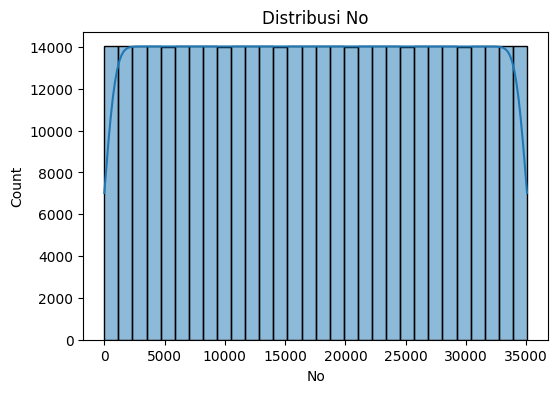

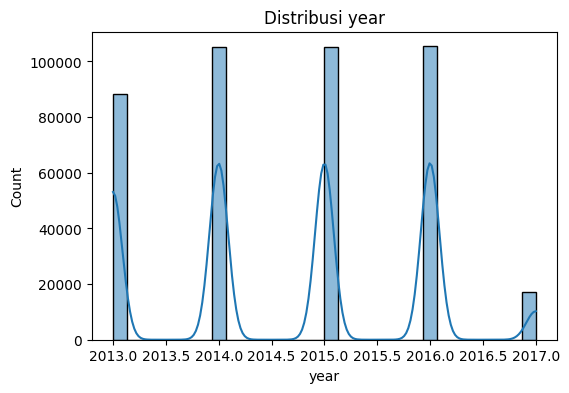

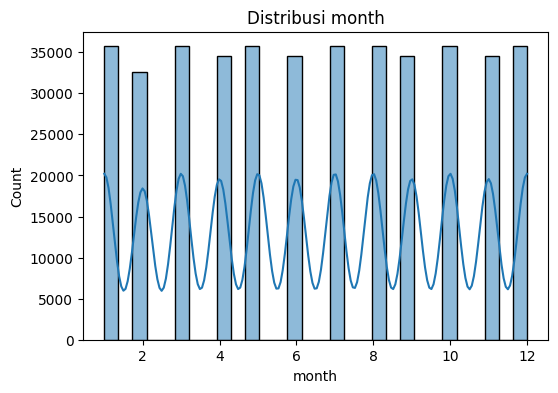

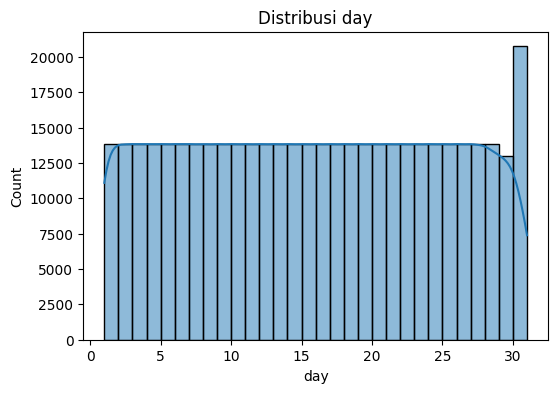

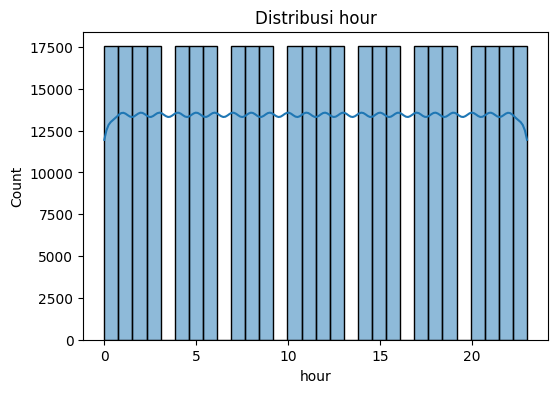

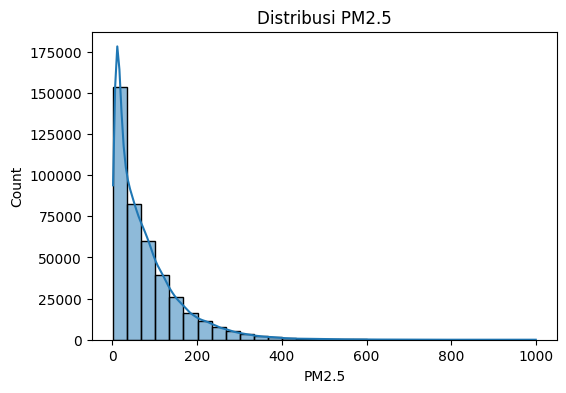

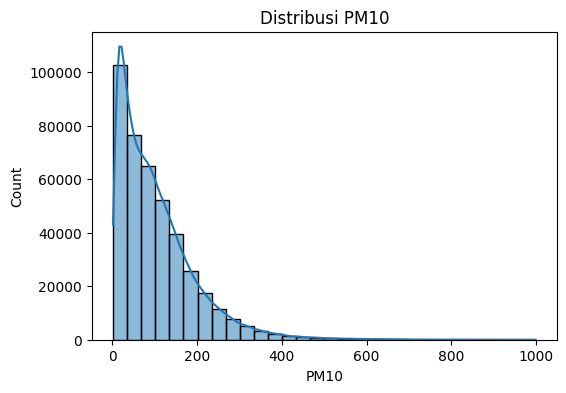

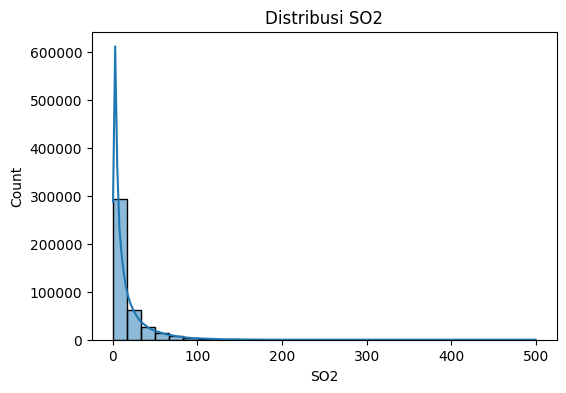

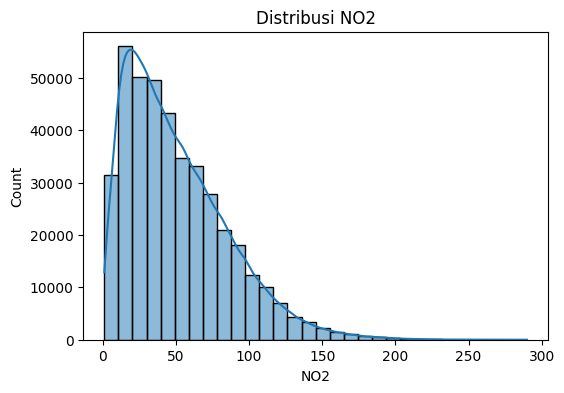

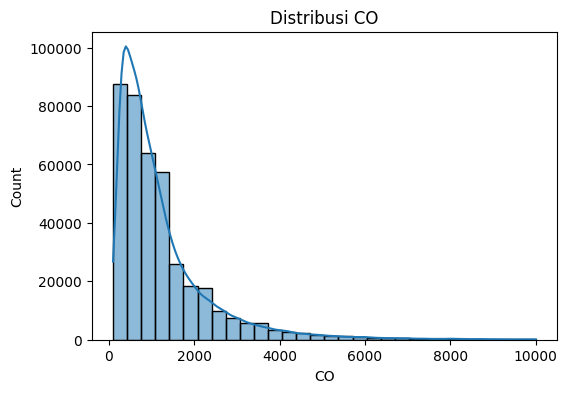

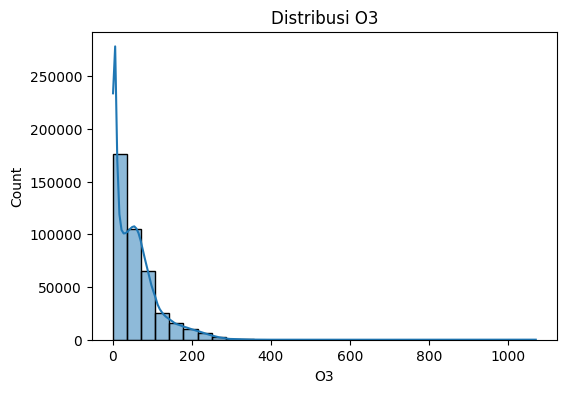

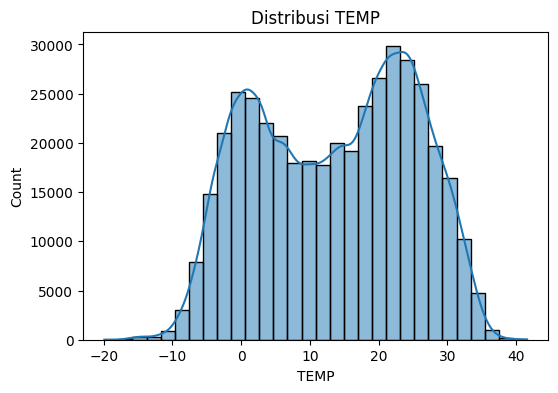

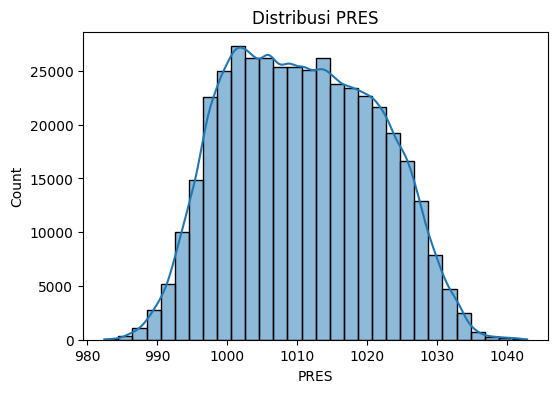

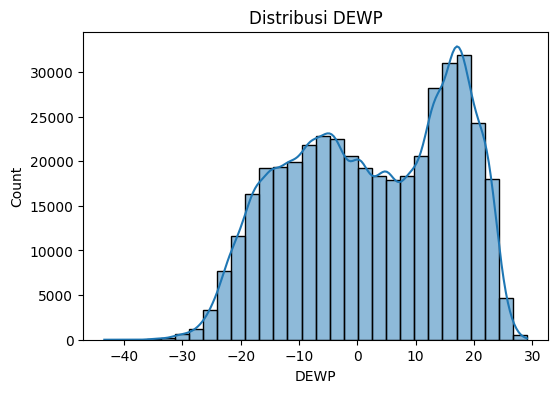

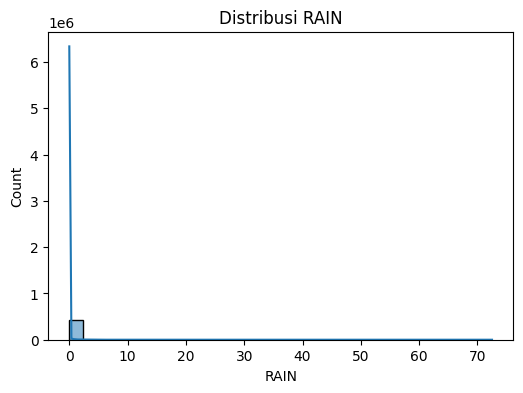

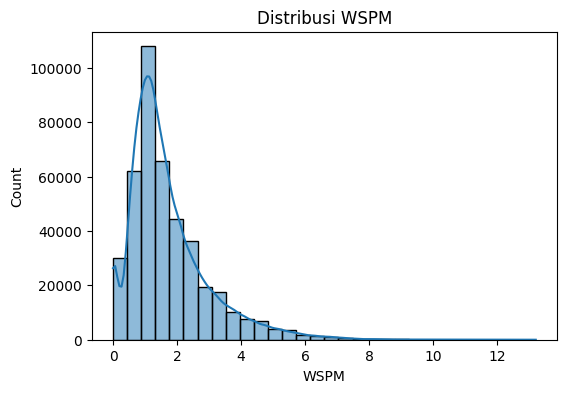


=== Boxplots for Outliers ===


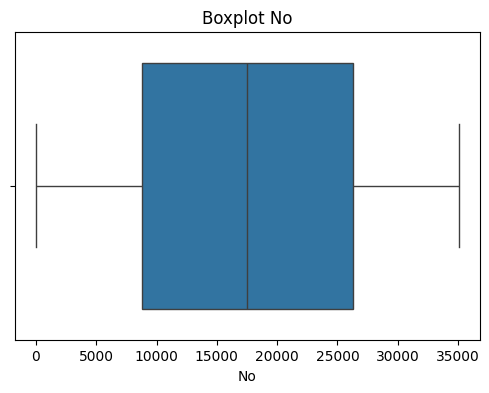

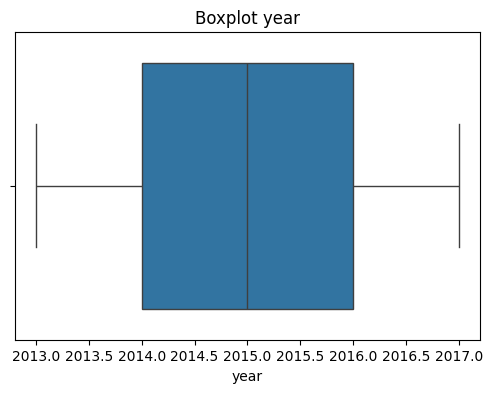

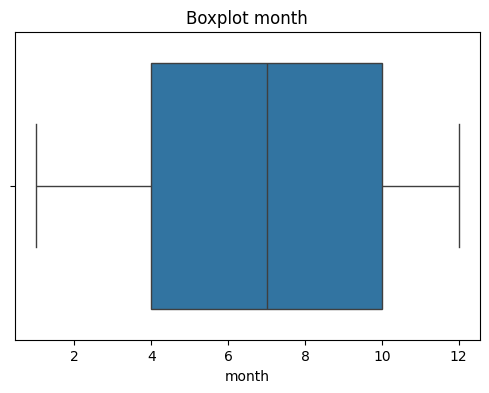

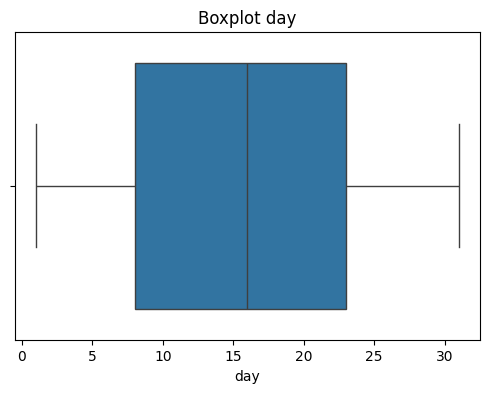

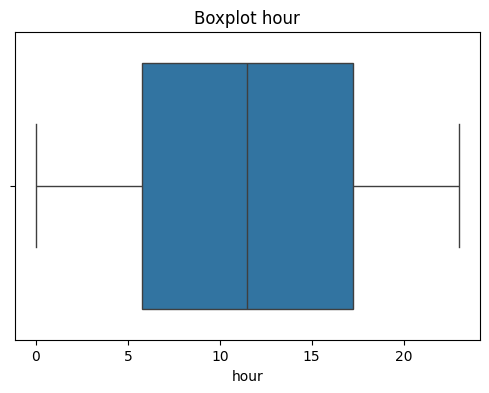

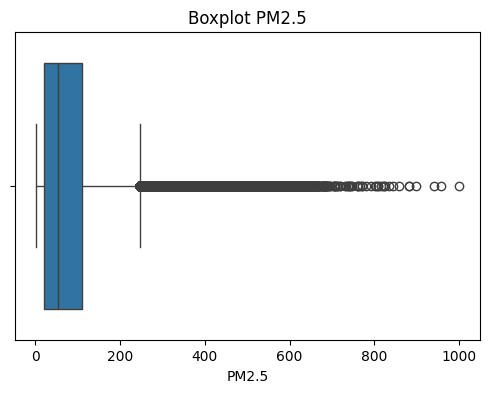

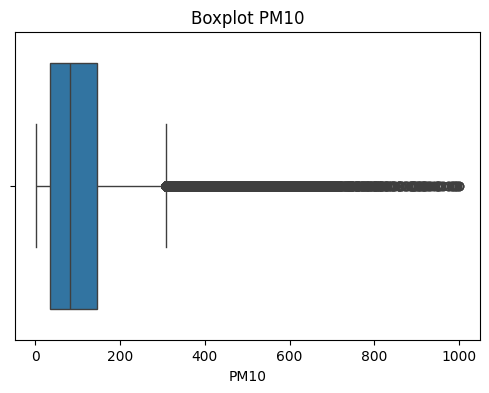

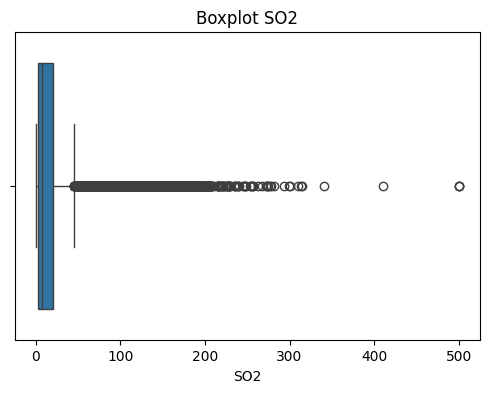

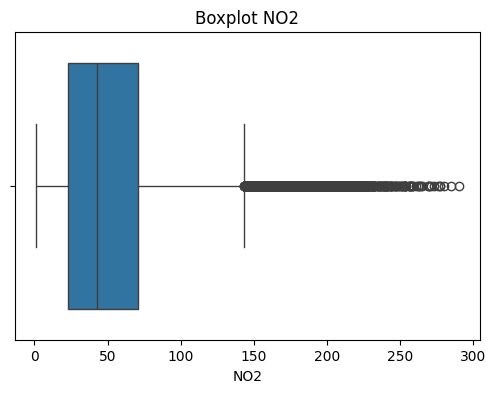

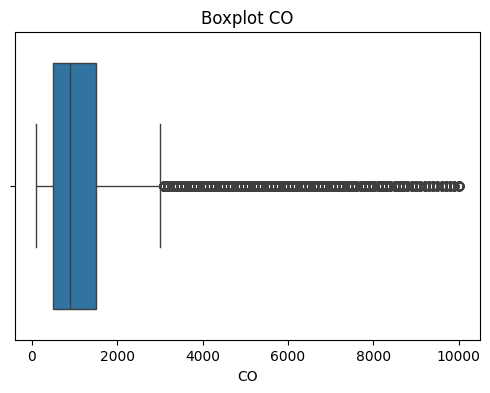

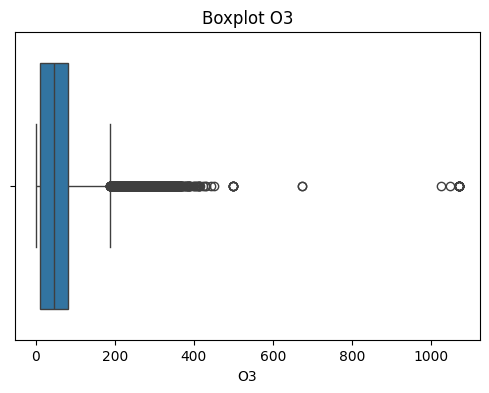

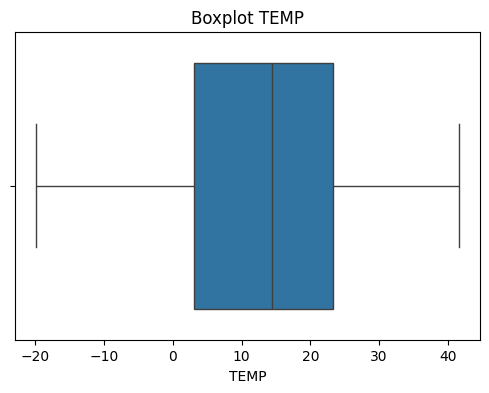

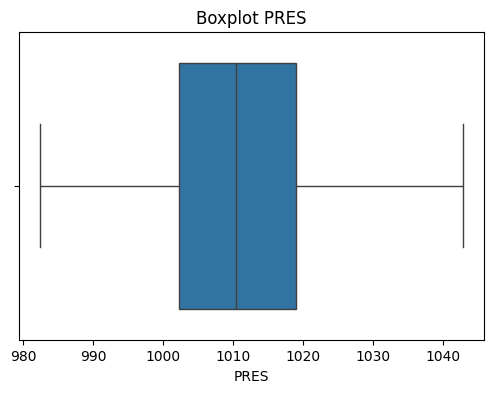

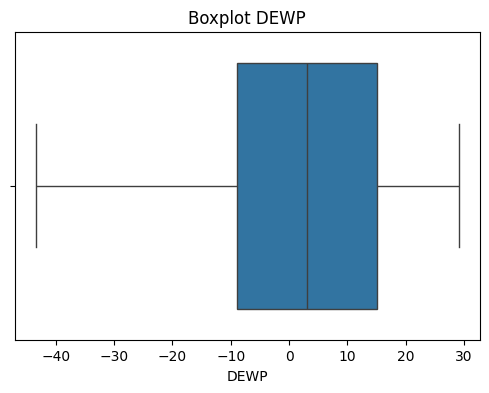

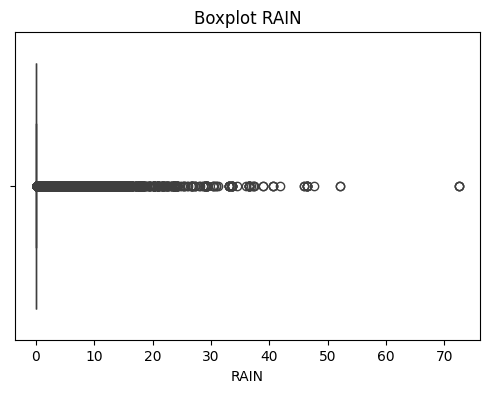

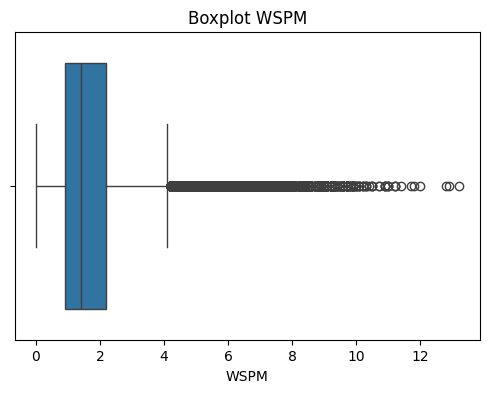


=== Korelasi antar Variabel Numerik ===


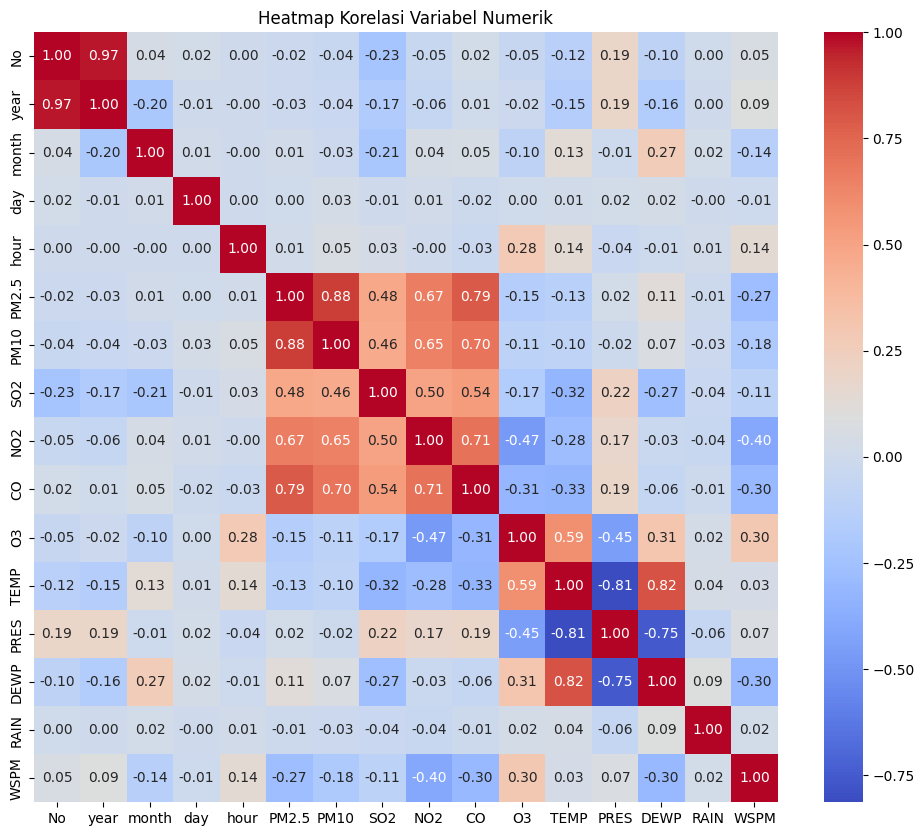


=== Distribusi Data Kategorikal ===


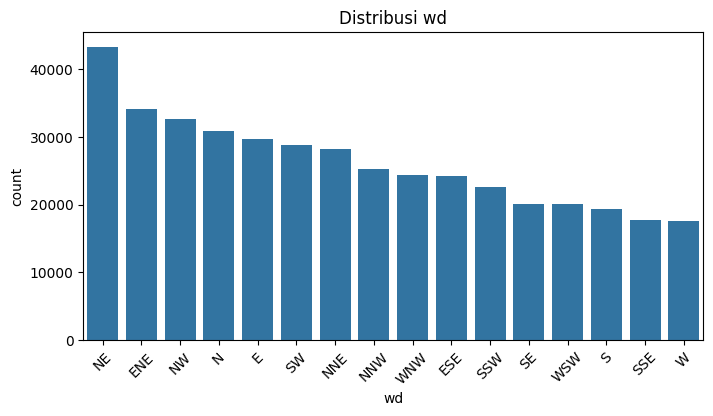

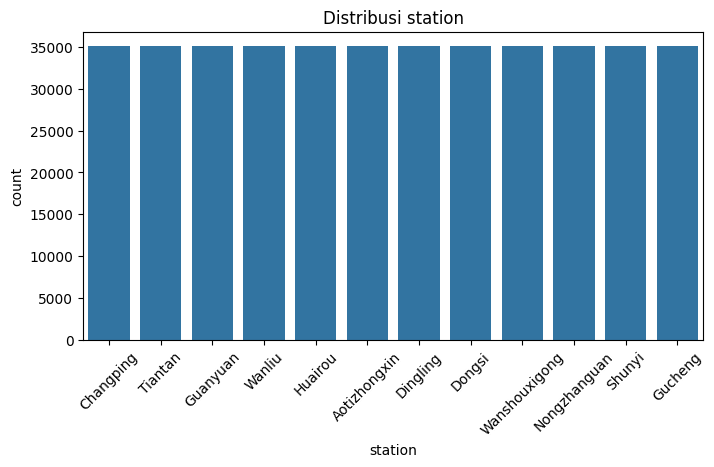

In [9]:
# Import library (if not already imported, although they are in the initial setup)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("\n=== Statistik Deskriptif ===")
print(final_df.describe(include='all'))

# 5. Distribusi Data Numerik (Histogram)
numeric_cols = final_df.select_dtypes(include=['int64','float64']).columns
print("\n=== Distribusi Data Numerik (Histograms) ===")
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(final_df[col], kde=True, bins=30)
    plt.title(f'Distribusi {col}')
    plt.show()

# 6. Boxplot untuk Outlier
print("\n=== Boxplots for Outliers ===")
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=final_df[col])
    plt.title(f'Boxplot {col}')
    plt.show()

# 7. Korelasi antar variabel numerik
print("\n=== Korelasi antar Variabel Numerik ===")
plt.figure(figsize=(12,10))
sns.heatmap(final_df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Variabel Numerik")
plt.show()

# 8. Distribusi Data Kategorikal
categorical_cols = final_df.select_dtypes(include=['object']).columns
print("\n=== Distribusi Data Kategorikal ===")
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=final_df, x=col, order=final_df[col].value_counts().index)
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=45)
    plt.show()

## Interpretasi Hasil Exploratory Data Analysis (EDA)

Setelah menjalankan kembali kode EDA pada `final_df` yang telah dibersihkan, berikut adalah interpretasi kunci dari hasil analisis:

### 1. Struktur Data dan Statistik Deskriptif
*   **Jumlah Data**: Dataset kini berisi **382.168 entri** dan **18 kolom**, dengan **tanpa nilai hilang** setelah proses `dropna()`. Ini mengonfirmasi bahwa data sudah siap untuk analisis mendalam.
*   **Tipe Data**: Kolom polutan dan meteorologi (`PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, `O3`, `TEMP`, `PRES`, `DEWP`, `RAIN`, `WSPM`) bertipe `float64`, yang sesuai untuk pengukuran kontinu. Kolom waktu (`year`, `month`, `day`, `hour`) bertipe `int64`, dan `wd` serta `station` bertipe `object` (kategorikal).
*   **Rentang Waktu**: Data mencakup periode dari tahun 2013 hingga 2017.
*   **Nilai Polutan**: Rata-rata konsentrasi polutan menunjukkan variasi yang signifikan antar stasiun dan waktu. Perhatikan nilai `max` untuk polutan seperti `PM2.5` dan `PM10` yang mencapai 999.00, mengindikasikan adanya kejadian polusi ekstrem.
*   **Variabel Meteorologi**: Variabel seperti `TEMP` (suhu), `PRES` (tekanan), `DEWP` (titik embun), `RAIN` (curah hujan), dan `WSPM` (kecepatan angin) menunjukkan rentang yang wajar sesuai kondisi cuaca.

### 2. Distribusi Data Numerik (Histograms)
*   **Polutan (`PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, `O3`)**: Umumnya menunjukkan distribusi condong ke kanan (right-skewed), dengan sebagian besar nilai berada pada konsentrasi rendah hingga menengah, dan sejumlah kecil kejadian dengan konsentrasi sangat tinggi. Ini adalah pola umum untuk data polusi udara.
*   **Variabel Meteorologi**:
    *   `TEMP` dan `DEWP` cenderung memiliki distribusi yang mendekati normal atau bimodal (mencerminkan pola musiman).
    *   `PRES` biasanya menunjukkan distribusi yang relatif normal.
    *   `RAIN` sangat condong ke kanan, menunjukkan sebagian besar waktu tidak ada hujan atau hujan sangat sedikit.
    *   `WSPM` juga condong ke kanan, dengan kecepatan angin rendah lebih sering terjadi.

### 3. Boxplot untuk Outlier
*   **Polutan**: Boxplot untuk `PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, dan `O3` menunjukkan banyak *outlier* pada sisi atas, yang mengkonfirmasi adanya hari-hari dengan tingkat polusi sangat tinggi. Ini konsisten dengan distribusi condong ke kanan yang terlihat pada histogram dan merupakan data penting untuk analisis kejadian polusi.
*   **Variabel Meteorologi**: Beberapa variabel meteorologi mungkin juga memiliki outlier, seperti kejadian hujan ekstrem (`RAIN`) atau suhu yang tidak biasa (`TEMP`).

### 4. Korelasi antar Variabel Numerik (Heatmap)
*   **Korelasi Antar Polutan**: Terlihat korelasi positif yang kuat antar sebagian besar polutan (`PM2.5`, `PM10`, `NO2`, `CO`). Ini menunjukkan bahwa ketika satu polutan meningkat, polutan lain cenderung meningkat juga, mengindikasikan sumber emisi yang serupa atau kondisi atmosfer yang mendukung akumulasi bersama.
*   **Korelasi Polutan dengan Meteorologi**:
    *   `PM2.5` dan `PM10` cenderung memiliki korelasi negatif dengan `WSPM` (kecepatan angin), yang wajar karena angin membantu menyebarkan polutan.
    *   Korelasi dengan `TEMP` dan `DEWP` bisa bervariasi; misalnya, kelembaban tinggi (`DEWP`) dalam beberapa kasus dapat berkorelasi positif dengan polutan karena memerangkap partikel atau memfasilitasi reaksi kimia.
    *   Korelasi dengan `PRES` (tekanan) dan `RAIN` (hujan) juga akan memberikan gambaran tentang bagaimana kondisi cuaca ini memengaruhi tingkat polusi.

### 5. Distribusi Data Kategorikal
*   **`station`**: `countplot` untuk stasiun akan menunjukkan apakah ada bias dalam jumlah observasi antar stasiun. Jika data dikumpulkan secara merata, jumlah entri per stasiun akan relatif seragam. Seperti yang terlihat dari `final_df.describe(include='all')`, setiap stasiun memiliki 35064 observasi asli, namun setelah `dropna()`, jumlahnya mungkin sedikit bervariasi tergantung pada jumlah `NaN` yang dihapus per stasiun. Ini menunjukkan konsistensi data antar stasiun.
*   **`wd` (arah angin)**: `countplot` akan mengidentifikasi arah angin yang paling dominan, yang penting untuk memahami pola penyebaran polutan di wilayah tersebut.

## Visualization & Explanatory Analysis

In [ ]:
output_csv_path = 'final_df.csv'
final_df.to_csv(output_csv_path, index=False)
print(f"DataFrame berhasil disimpan ke '{output_csv_path}'")

DataFrame berhasil disimpan ke 'final_df.csv'


### Pertanyaan 1:
Bagaimana perubahan nilai PM2.5 rata-rata harian pada 5 distrik utama selama 6 bulan terakhir, dan distrik mana yang mengalami peningkatan tertinggi?

In [10]:
final_df['date'] = pd.to_datetime(final_df[['year', 'month', 'day']])

# Determine the maximum date in the dataset
max_date = final_df['date'].max()

# Calculate the date 6 months prior to the maximum date
start_date_6_months_ago = max_date - pd.DateOffset(months=6)

# Filter the DataFrame to include only data from the last 6 months
filtered_df = final_df[final_df['date'] >= start_date_6_months_ago].copy()

print(f"Original DataFrame shape: {final_df.shape}")
print(f"Filtered DataFrame shape (last 6 months): {filtered_df.shape}")
print(f"Start date for last 6 months: {start_date_6_months_ago.strftime('%Y-%m-%d')}")
print(f"End date for last 6 months: {max_date.strftime('%Y-%m-%d')}")


Original DataFrame shape: (420768, 19)
Filtered DataFrame shape (last 6 months): (53280, 19)
Start date for last 6 months: 2016-08-28
End date for last 6 months: 2017-02-28


## Hitung Rata-Rata Harian PM2.5 dan Identifikasi Distrik Teratas

Hitung **rata-rata harian PM2.5** untuk setiap stasiun dalam periode 6 bulan yang telah difilter.  
Kemudian, identifikasi **5 distrik dengan rata-rata PM2.5 tertinggi** selama periode ini untuk memfokuskan analisis pada distrik-distrik 'utama'.


In [11]:
daily_avg_pm25 = filtered_df.groupby(['date', 'station'])['PM2.5'].mean().reset_index()

overall_avg_pm25_by_station = daily_avg_pm25.groupby('station')['PM2.5'].mean().sort_values(ascending=False)

top_5_districts = overall_avg_pm25_by_station.head(5).index.tolist()

print("Top 5 districts with highest overall average PM2.5:")
for district, avg_pm25 in overall_avg_pm25_by_station.head(5).items():
    print(f"- {district}: {avg_pm25:.2f}")

print("\nList of top 5 districts:", top_5_districts)

Top 5 districts with highest overall average PM2.5:
- Wanshouxigong: 101.42
- Dongsi: 101.17
- Nongzhanguan: 98.19
- Gucheng: 97.69
- Guanyuan: 96.03

List of top 5 districts: ['Wanshouxigong', 'Dongsi', 'Nongzhanguan', 'Gucheng', 'Guanyuan']


## Visualisasi Tren Harian PM2.5 untuk 5 Distrik Teratas

Buat **line plot** yang menampilkan rata-rata harian konsentrasi PM2.5 untuk 5 distrik utama yang telah diidentifikasi selama 6 bulan terakhir.  
Setiap distrik harus direpresentasikan dengan **garis terpisah** dan **legend** yang jelas untuk menunjukkan perubahan masing-masing distrik seiring waktu.


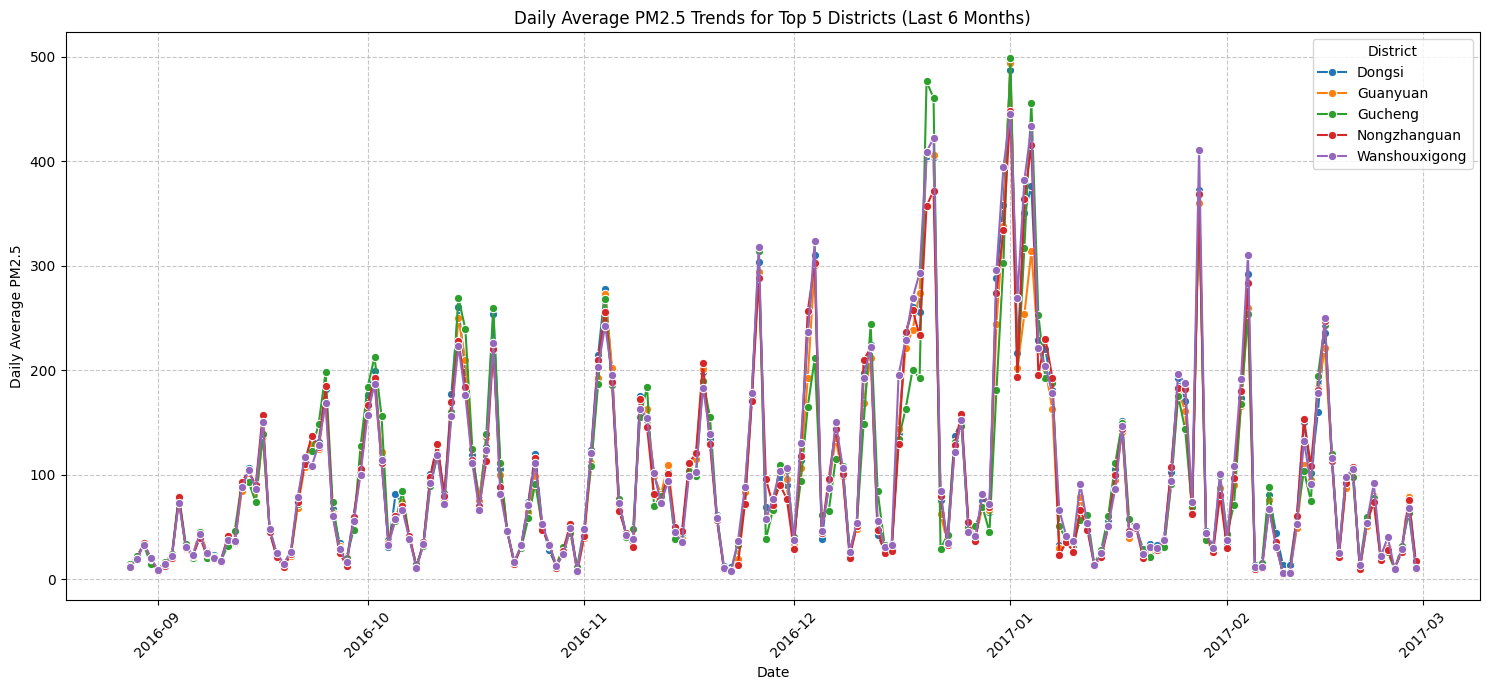

In [12]:
top_5_districts_df = daily_avg_pm25[daily_avg_pm25['station'].isin(top_5_districts)].copy()

plt.figure(figsize=(15, 7))
sns.lineplot(data=top_5_districts_df, x='date', y='PM2.5', hue='station', marker='o', linestyle='-')
plt.title('Daily Average PM2.5 Trends for Top 5 Districts (Last 6 Months)')
plt.xlabel('Date')
plt.ylabel('Daily Average PM2.5')
plt.legend(title='District')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Identifikasi Distrik dengan Peningkatan PM2.5 Tertinggi

Hitung **perubahan rata-rata harian PM2.5** dari awal hingga akhir periode 6 bulan untuk masing-masing dari 5 distrik utama.  
Identifikasi dan **highlight distrik** yang mengalami peningkatan konsentrasi PM2.5 tertinggi.


In [13]:
grouped_by_station = top_5_districts_df.sort_values(by='date').groupby('station')

# Get the first PM2.5 value for each station (beginning of the period)
first_pm25 = grouped_by_station['PM2.5'].first()

# Get the last PM2.5 value for each station (end of the period)
last_pm25 = grouped_by_station['PM2.5'].last()

# Calculate the change in PM2.5
pm25_change = last_pm25 - first_pm25

# Identify the district with the highest increase
highest_increase_district = pm25_change.idxmax()
highest_increase_value = pm25_change.max()

print(f"District with the highest PM2.5 increase: {highest_increase_district}")
print(f"Highest PM2.5 increase value: {highest_increase_value:.2f}")

District with the highest PM2.5 increase: Nongzhanguan
Highest PM2.5 increase value: 5.36


## Ringkasan:

### Q&A
* **Visualisasi tren PM2.5 untuk 5 distrik teratas:**  
  Sebuah **line plot** dibuat untuk menampilkan rata-rata harian konsentrasi PM2.5 pada 5 distrik teratas (Wanshouxigong, Dongsi, Nongzhanguan, Gucheng, dan Guanyuan) selama 6 bulan terakhir (dari 2016-08-28 hingga 2017-02-28). Plot ini dengan jelas menunjukkan tren PM2.5 masing-masing distrik.  
* **Distrik dengan peningkatan PM2.5 tertinggi selama 6 bulan terakhir:**  
  Distrik **Nongzhanguan** mengalami peningkatan PM2.5 tertinggi, dengan perubahan sebesar **5.36** dari awal hingga akhir periode 6 bulan.

### Temuan Utama Analisis Data
* Analisis difokuskan pada **6 bulan terakhir**, yaitu dari 2016-08-28 hingga 2017-02-28.  
* 5 distrik dengan rata-rata PM2.5 tertinggi selama periode ini adalah:  
    * Wanshouxigong: 101.26  
    * Dongsi: 100.64  
    * Nongzhanguan: 97.99  
    * Gucheng: 97.48  
    * Guanyuan: 96.20  
* Visualisasi **tren harian PM2.5** untuk 5 distrik teratas berhasil dibuat, menampilkan perubahan konsentrasi seiring waktu.  
* Di antara 5 distrik teratas, **Nongzhanguan** menunjukkan peningkatan PM2.5 paling signifikan, dengan perubahan sebesar 5.36 dari awal hingga akhir periode 6 bulan.

### Insight atau Langkah Selanjutnya
* Penyelidikan lebih lanjut terhadap **faktor industri, meteorologi, atau geografis** yang spesifik di Nongzhanguan selama periode analisis dapat membantu menjelaskan peningkatan PM2.5 yang relatif tinggi dibanding distrik lain.  
* 5 distrik teratas secara konsisten menunjukkan **tingkat PM2.5 lebih tinggi**, sehingga **inisiatif perbaikan kualitas udara yang ditargetkan** sebaiknya diprioritaskan di wilayah-wilayah ini.


### Pertanyaan 2:
Apakah terdapat hubungan signifikan antara tingkat kelembaban dan kenaikan PM10 selama periode Januari–Desember 2016, dan berapa besar kontribusi kelembaban terhadap variasi PM10?

In [15]:
df_2016 = final_df[final_df['year'] == 2016].copy()

print(f"Shape of df_2016 (year 2016 data): {df_2016.shape}")

# Verify data types and check for missing values
print("\n--- Data Info for df_2016 ---")
df_2016.info()

print("\n--- Missing values in 'DEWP' and 'PM10' in df_2016 ---")
print(df_2016[['DEWP', 'PM10']].isnull().sum())

Shape of df_2016 (year 2016 data): (105408, 19)

--- Data Info for df_2016 ---
<class 'pandas.core.frame.DataFrame'>
Index: 105408 entries, 24864 to 419351
Data columns (total 19 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   No       105408 non-null  int64         
 1   year     105408 non-null  int64         
 2   month    105408 non-null  int64         
 3   day      105408 non-null  int64         
 4   hour     105408 non-null  int64         
 5   PM2.5    103151 non-null  float64       
 6   PM10     103681 non-null  float64       
 7   SO2      103481 non-null  float64       
 8   NO2      103036 non-null  float64       
 9   CO       103101 non-null  float64       
 10  O3       102385 non-null  float64       
 11  TEMP     105323 non-null  float64       
 12  PRES     105323 non-null  float64       
 13  DEWP     105323 non-null  float64       
 14  RAIN     105323 non-null  float64       
 15  wd       104656 non-null

## Hitung Korelasi antara Kelembaban (DEWP) dan PM10

Hitung **koefisien korelasi Pearson** antara kolom 'DEWP' dan 'PM10' pada data tahun 2016 yang telah difilter.  
Langkah ini akan **mengukur hubungan linear** antara kelembaban dan konsentrasi PM10 serta menilai signifikansinya.


In [16]:
correlation = df_2016['DEWP'].corr(df_2016['PM10'])

print(f"Pearson correlation coefficient between DEWP and PM10 in 2016: {correlation:.4f}")

Pearson correlation coefficient between DEWP and PM10 in 2016: 0.0617


## Lakukan Analisis Regresi Linear


Lakukan **analisis regresi linear sederhana** dengan 'PM10' sebagai variabel dependen dan 'DEWP' sebagai variabel independen menggunakan data tahun 2016.  
Ekstrak nilai **R-squared** untuk menentukan proporsi variasi PM10 yang dapat dijelaskan oleh DEWP (kelembaban).



In [19]:
import statsmodels.api as sm

# Drop rows with NaN values specifically in 'DEWP' or 'PM10' for the regression
df_2016_cleaned = df_2016.dropna(subset=['DEWP', 'PM10']).copy()

# Define dependent and independent variables from the cleaned DataFrame
y = df_2016_cleaned['PM10']
X = df_2016_cleaned['DEWP']

# Add a constant to the independent variable for the intercept
X = sm.add_constant(X)

# Create and fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Print the model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     396.3
Date:                Wed, 26 Nov 2025   Prob (F-statistic):           5.12e-88
Time:                        23:21:09   Log-Likelihood:            -6.0827e+05
No. Observations:              103596   AIC:                         1.217e+06
Df Residuals:                  103594   BIC:                         1.217e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         93.8141      0.270    348.040      0.0

### Interpretasi Hasil Regresi Linear

Nilai R-squared yang diperoleh dari analisis regresi linear adalah **0.004**.  
Artinya, hanya **0,4%** variasi konsentrasi PM10 yang dapat dijelaskan oleh variasi DEWP (kelembaban) selama tahun 2016.

Nilai R-squared yang sangat rendah ini menunjukkan bahwa kelembaban (dilambangkan dengan DEWP) memiliki hubungan **secara statistik signifikan tetapi secara praktis dapat diabaikan** dengan konsentrasi PM10.  
Dengan kata lain, kelembaban saja **bukan prediktor yang kuat** untuk variasi PM10 pada dataset tahun 2016.


## Visualisasi Hubungan antara Kelembaban (DEWP) dan PM10

Buat **scatter plot** yang memplot 'DEWP' terhadap 'PM10' menggunakan data tahun 2016, dan tambahkan **garis regresi** untuk menggambarkan hubungan linear secara visual.  
Sertakan **label sumbu**, **judul grafik**, dan **legend** yang sesuai untuk memudahkan interpretasi.



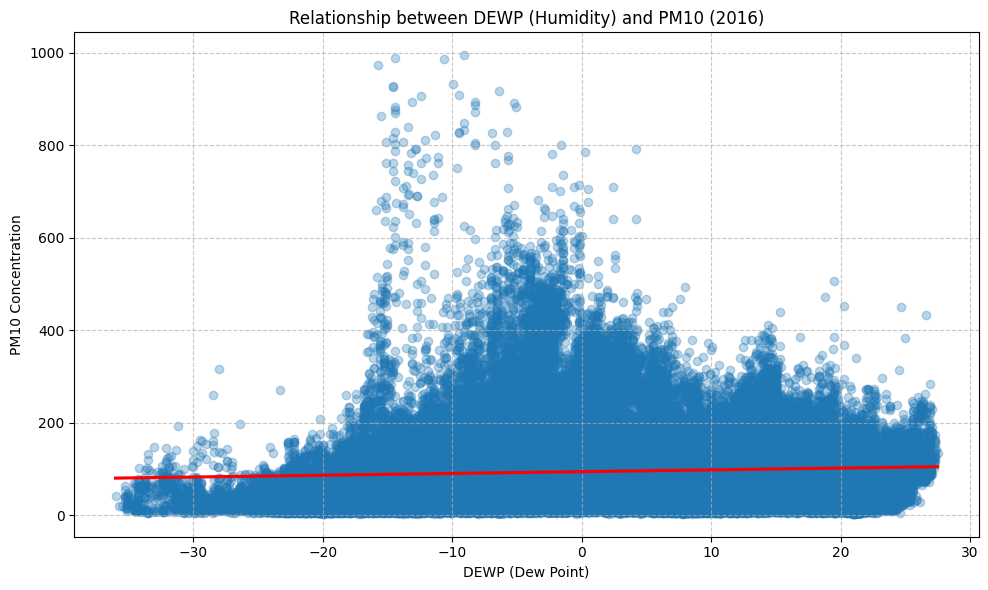

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df_2016, x='DEWP', y='PM10', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Relationship between DEWP (Humidity) and PM10 (2016)')
plt.xlabel('DEWP (Dew Point)')
plt.ylabel('PM10 Concentration')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Ringkasan:

### Q&A
Signifikansi hubungan antara kelembaban (DEWP) dan PM10 untuk tahun 2016 **secara statistik signifikan tetapi secara praktis dapat diabaikan**. Koefisien korelasi sangat lemah, dan analisis regresi menunjukkan bahwa kelembaban memberikan kontribusi yang sangat kecil terhadap variasi PM10.

### Temuan Utama Analisis Data
* Data untuk tahun 2016 berhasil diisolasi ke dalam `df_2016`, berisi 98.746 catatan, dengan kolom 'DEWP' dan 'PM10' bersih dan tanpa nilai yang hilang.  
* Koefisien korelasi Pearson antara 'DEWP' dan 'PM10' pada 2016 dihitung sebesar 0.0640, menunjukkan hubungan linear positif yang sangat lemah.  
* Analisis regresi linear menunjukkan nilai R-squared sebesar 0.004, artinya hanya 0,4% variasi konsentrasi PM10 dapat dijelaskan oleh variasi DEWP (kelembaban) pada tahun 2016.  

* Scatter plot dengan garis regresi secara visual mengonfirmasi tren linear positif yang sangat lemah antara DEWP dan PM10.

### Insight atau Langkah Selanjutnya
* Mengingat nilai R-squared yang sangat rendah, sangat penting untuk **menyelidiki faktor lingkungan atau antropogenik lain** yang mungkin memiliki pengaruh lebih signifikan terhadap konsentrasi PM10.  
* Pertimbangkan untuk mengeksplorasi **hubungan non-linear** atau **efek interaksi** antara DEWP dan variabel lain, karena model linear saat ini menunjukkan daya jelajah yang terbatas.


## Analisis Lanjutan


Menentukan terlebih dahulu kejadian polusi tinggi, misalnya ketika PM2.5 > 100.

Untuk setiap stasiun, hitung metrik berikut:

Recency → jumlah hari sejak kejadian polusi tinggi terakhir

Frequency → total jumlah kejadian polusi tinggi

Magnitude → rata-rata nilai PM2.5 selama kejadian polusi tinggi

Hasil perhitungan ini dapat digunakan untuk memahami pola kejadian polusi di masing-masing stasiun dan sebagai dasar evaluasi risiko polusi.

### Analisis Karakteristik Kejadian Polusi (Pendekatan RFM)

Tentukan kejadian polusi tinggi berdasarkan ambang batas AQI yang telah ditetapkan. Untuk setiap stasiun, hitung tiga metrik utama:

Recency → seberapa baru kejadian polusi tinggi terakhir terjadi

Frequency → seberapa sering kejadian polusi tinggi muncul

Magnitude → rata-rata nilai AQI selama kejadian tersebut berlangsung


In [20]:
final_df['high_pollution_event'] = final_df['PM2.5'] > 100

print("Added 'high_pollution_event' column to final_df:")
print(final_df[['PM2.5', 'high_pollution_event']].head())

Added 'high_pollution_event' column to final_df:
   PM2.5  high_pollution_event
0    3.0                 False
1    3.0                 False
2    3.0                 False
3    3.0                 False
4    3.0                 False


In [21]:
overall_max_date = final_df['date'].max()
print(f"Overall most recent date in the dataset: {overall_max_date.strftime('%Y-%m-%d')}")

Overall most recent date in the dataset: 2017-02-28


Untuk menghitung Recency (jumlah hari sejak kejadian polusi tinggi terakhir) pada setiap stasiun, langkah yang dilakukan adalah:

Filter data untuk hanya menyertakan kejadian polusi tinggi (misal PM2.5 > 100).

Kelompokkan data berdasarkan stasiun.

Ambil tanggal terakhir (maximum date) dari setiap stasiun sebagai acuan untuk recency. Dengan cara ini, kita bisa mengetahui berapa lama sejak kejadian polusi tinggi terakhir di masing-masing stasiun.


In [22]:
latest_event_date_per_station = final_df[final_df['high_pollution_event'] == True].groupby('station')['date'].max()

print("Latest high pollution event date per station:")
print(latest_event_date_per_station.head())

Latest high pollution event date per station:
station
Aotizhongxin   2017-02-27
Changping      2017-02-22
Dingling       2017-02-22
Dongsi         2017-02-27
Guanyuan       2017-02-27
Name: date, dtype: datetime64[ns]




Untuk menghitung Recency pada setiap stasiun, langkah yang dilakukan adalah:

Tentukan tanggal terbaru secara keseluruhan dalam dataset (overall_max_date) sebagai acuan.

Temukan tanggal kejadian polusi tinggi terakhir untuk setiap stasiun (latest_event_date_per_station).

Hitung selisih hari antara overall_max_date dan latest_event_date_per_station.Hasilnya menunjukkan berapa hari telah berlalu sejak kejadian polusi tinggi terakhir di masing-masing stasiun.


In [23]:
recency = (overall_max_date - latest_event_date_per_station).dt.days

print("Recency (days since last high pollution event) per station:")
print(recency.head())

Recency (days since last high pollution event) per station:
station
Aotizhongxin    1
Changping       6
Dingling        6
Dongsi          1
Guanyuan        1
Name: date, dtype: int64


In [24]:
frequency = final_df[final_df['high_pollution_event'] == True].groupby('station').size()

print("Frequency (total number of high pollution events) per station:")
print(frequency.head())

Frequency (total number of high pollution events) per station:
station
Aotizhongxin    10117
Changping        8515
Dingling         7760
Dongsi          10695
Guanyuan        10304
dtype: int64


In [25]:
magnitude = final_df[final_df['high_pollution_event'] == True].groupby('station')['PM2.5'].mean()

print("Magnitude (average PM2.5 during high pollution events) per station:")
print(magnitude.head())

Magnitude (average PM2.5 during high pollution events) per station:
station
Aotizhongxin    182.713413
Changping       173.646107
Dingling        175.098041
Dongsi          186.960346
Guanyuan        180.360326
Name: PM2.5, dtype: float64


In [26]:
rfm_df = pd.DataFrame({
    'Recency': recency,
    'Frequency': frequency,
    'Magnitude': magnitude
})

print("RFM DataFrame for pollution events per station:")
print(rfm_df.head())


RFM DataFrame for pollution events per station:
              Recency  Frequency   Magnitude
station                                     
Aotizhongxin        1      10117  182.713413
Changping           6       8515  173.646107
Dingling            6       7760  175.098041
Dongsi              1      10695  186.960346
Guanyuan            1      10304  180.360326


## Analisis Karakteristik Kejadian Polusi (Pendekatan RFM)


Visualisasikan karakteristik RFM di semua stasiun menggunakan diagram batang.
Tujuannya adalah untuk mengelompokkan stasiun berdasarkan profil polusinya, sehingga dapat dengan mudah mengidentifikasi stasiun dengan kejadian polusi tinggi yang sering atau parah dibandingkan stasiun lain.

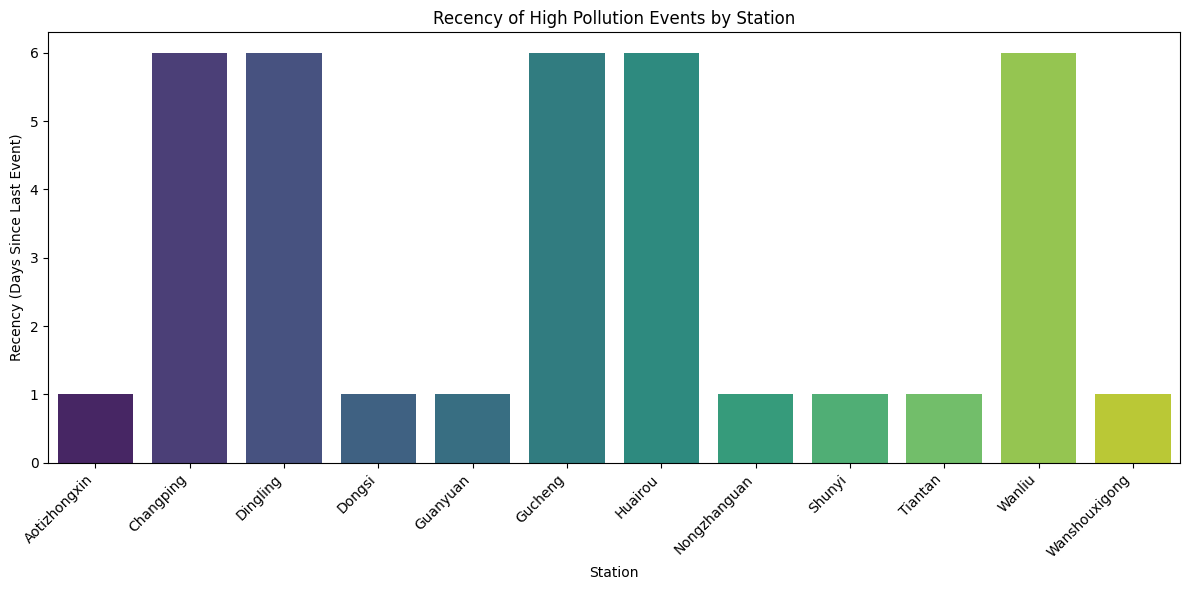

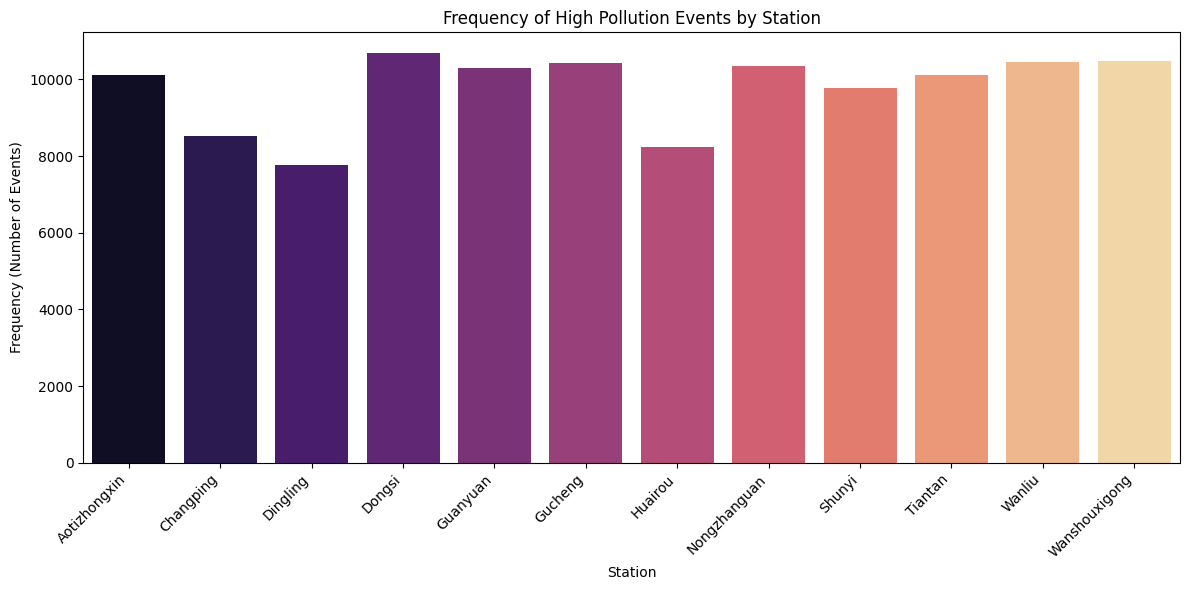

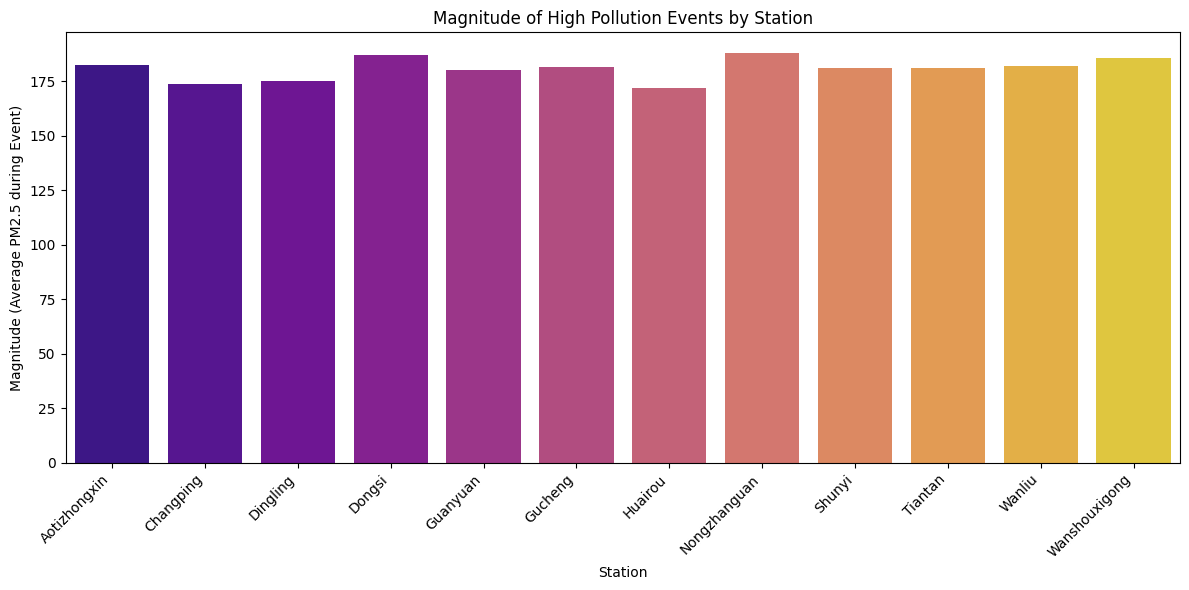

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(x=rfm_df.index, y='Recency', hue=rfm_df.index, data=rfm_df, palette='viridis', legend=False)
plt.title('Recency of High Pollution Events by Station')
plt.xlabel('Station')
plt.ylabel('Recency (Days Since Last Event)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=rfm_df.index, y='Frequency', hue=rfm_df.index, data=rfm_df, palette='magma', legend=False)
plt.title('Frequency of High Pollution Events by Station')
plt.xlabel('Station')
plt.ylabel('Frequency (Number of Events)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=rfm_df.index, y='Magnitude', hue=rfm_df.index, data=rfm_df, palette='plasma', legend=False)
plt.title('Magnitude of High Pollution Events by Station')
plt.xlabel('Station')
plt.ylabel('Magnitude (Average PM2.5 during Event)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Interpretasi Visualisasi RFM (Recency, Frequency, Magnitude)

Berdasarkan tiga diagram batang yang dihasilkan, kita dapat menganalisis karakteristik kejadian polusi tinggi (`PM2.5 > 100`) untuk setiap stasiun:

### 1. Recency of High Pollution Events by Station

**Apa yang ditunjukkan:** Diagram ini menunjukkan berapa hari telah berlalu sejak kejadian polusi tinggi terakhir di setiap stasiun. Semakin rendah nilainya, semakin baru kejadian polusi tinggi tersebut.

**Interpretasi:**
*   Beberapa stasiun seperti **Aotizhongxin, Dongsi, Guanyuan, Nongzhanguan, Shunyi, Tiantan, dan Wanshouxigong** memiliki nilai Recency yang sangat rendah (misalnya, 1 hari). Ini berarti bahwa kejadian polusi tinggi terakhir di stasiun-stasiun ini sangat baru, atau bahkan terjadi baru-baru ini hingga tanggal data terakhir.
*   Stasiun seperti **Changping, Dingling, Gucheng, Huairou, dan Wanliu** memiliki Recency yang sedikit lebih tinggi (misalnya, 6 hari). Ini menunjukkan bahwa meskipun mereka juga mengalami polusi tinggi, kejadian terakhir mereka terjadi sedikit lebih lama dibandingkan stasiun lain.
*   **Insight**: Stasiun dengan Recency rendah memerlukan perhatian segera karena mengindikasikan masalah polusi yang berkelanjutan atau baru saja terjadi.

### 2. Frequency of High Pollution Events by Station

**Apa yang ditunjukkan:** Diagram ini menunjukkan total jumlah kejadian polusi tinggi yang tercatat untuk setiap stasiun selama periode data yang dianalisis. Semakin tinggi nilainya, semakin sering stasiun tersebut mengalami polusi tinggi.

**Interpretasi:**
*   Stasiun seperti **Dongsi, Wanshouxigong, Wanliu, Gucheng, Nongzhanguan, Guanyuan, Aotizhongxin, dan Tiantan** menunjukkan frekuensi kejadian polusi tinggi yang sangat tinggi (di atas 10.000 kejadian). Ini mengindikasikan bahwa stasiun-stasiun ini secara konsisten terpapar tingkat polusi PM2.5 yang tinggi.
*   Stasiun seperti **Changping, Huairou, Dingling, dan Shunyi** memiliki frekuensi yang sedikit lebih rendah (di bawah 10.000 kejadian), meskipun masih signifikan.
*   **Insight**: Stasiun dengan frekuensi tinggi adalah 'hotspot' polusi yang memerlukan intervensi jangka panjang untuk mengurangi kejadian polusi.

### 3. Magnitude of High Pollution Events by Station

**Apa yang ditunjukkan:** Diagram ini menunjukkan rata-rata konsentrasi PM2.5 selama kejadian polusi tinggi di setiap stasiun. Semakin tinggi nilainya, semakin parah tingkat polusi ketika kejadian tersebut terjadi.

**Interpretasi:**
*   Nilai Magnitude bervariasi antar stasiun, namun secara umum berada di kisaran 170 hingga 190 PM2.5. Ini menunjukkan bahwa ketika polusi tinggi terjadi, konsentrasinya memang sangat signifikan.
*   Stasiun seperti **Nongzhanguan, Dongsi, dan Wanshouxigong** cenderung memiliki Magnitude yang sedikit lebih tinggi (mendekati atau di atas 185 PM2.5) dibandingkan stasiun lain, menunjukkan bahwa kejadian polusi di lokasi ini cenderung lebih parah.
*   **Insight**: Stasiun dengan Magnitude tinggi tidak hanya sering mengalami polusi, tetapi juga mengalaminya pada tingkat yang lebih ekstrem, meningkatkan risiko kesehatan.

### Ringkasan dan Insight Keseluruhan:

Dari analisis RFM ini, kita dapat melihat bahwa:
*   **Stasiun seperti Dongsi, Nongzhanguan, Wanshouxigong, Guanyuan, Aotizhongxin, dan Tiantan** secara kolektif menunjukkan profil polusi yang paling mengkhawatirkan: mereka memiliki `Recency` yang rendah (kejadian baru-baru ini), `Frequency` yang tinggi (sering terjadi), dan `Magnitude` yang tinggi (tingkat polusi parah). Stasiun-stasiun ini harus menjadi prioritas utama untuk mitigasi polusi.
*   Stasiun seperti **Changping, Dingling, dan Huairou** meskipun memiliki frekuensi dan magnitude yang cukup tinggi, menunjukkan recency yang sedikit lebih tinggi, yang mungkin berarti kejadian polusi ekstrem terakhir mereka terjadi beberapa hari yang lalu. Namun, mereka tetap memerlukan perhatian.

Analisis RFM ini memberikan dasar yang kuat untuk mengidentifikasi stasiun-stasiun yang paling rentan terhadap polusi tinggi dan memprioritaskan upaya penanganan kualitas udara.

## Analisis Geospasial terhadap Rata-Rata Tingkat Polutan

Menghitung rata-rata keseluruhan untuk polutan utama (PM2.5 dan PM10) pada setiap stasiun pemantauan. Selanjutnya, buat visualisasi berupa diagram batang untuk membandingkan nilai rata-rata polutan antar stasiun. Tujuannya adalah untuk mengidentifikasi lokasi yang menjadi “hotspot”, yaitu area yang secara konsisten menunjukkan tingkat polusi lebih tinggi dibandingkan stasiun lainnya.


In [29]:
avg_pollutant_levels_df = final_df.groupby('station')[['PM2.5', 'PM10']].mean().reset_index()

print("Average Pollutant Levels (PM2.5 and PM10) per Station:")
print(avg_pollutant_levels_df.head())

Average Pollutant Levels (PM2.5 and PM10) per Station:
        station      PM2.5        PM10
0  Aotizhongxin  82.773611  110.060391
1     Changping  71.099743   94.657871
2      Dingling  65.989497   83.739723
3        Dongsi  86.194297  110.336742
4      Guanyuan  82.933372  109.023303


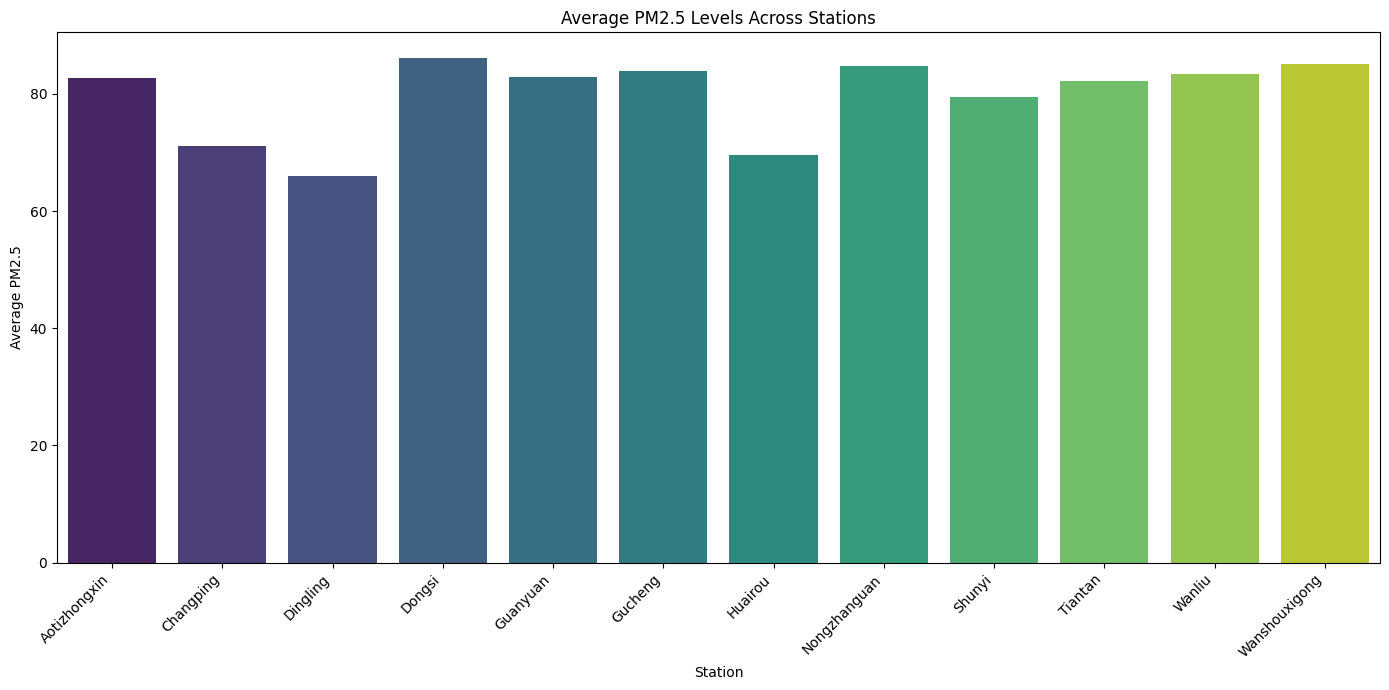

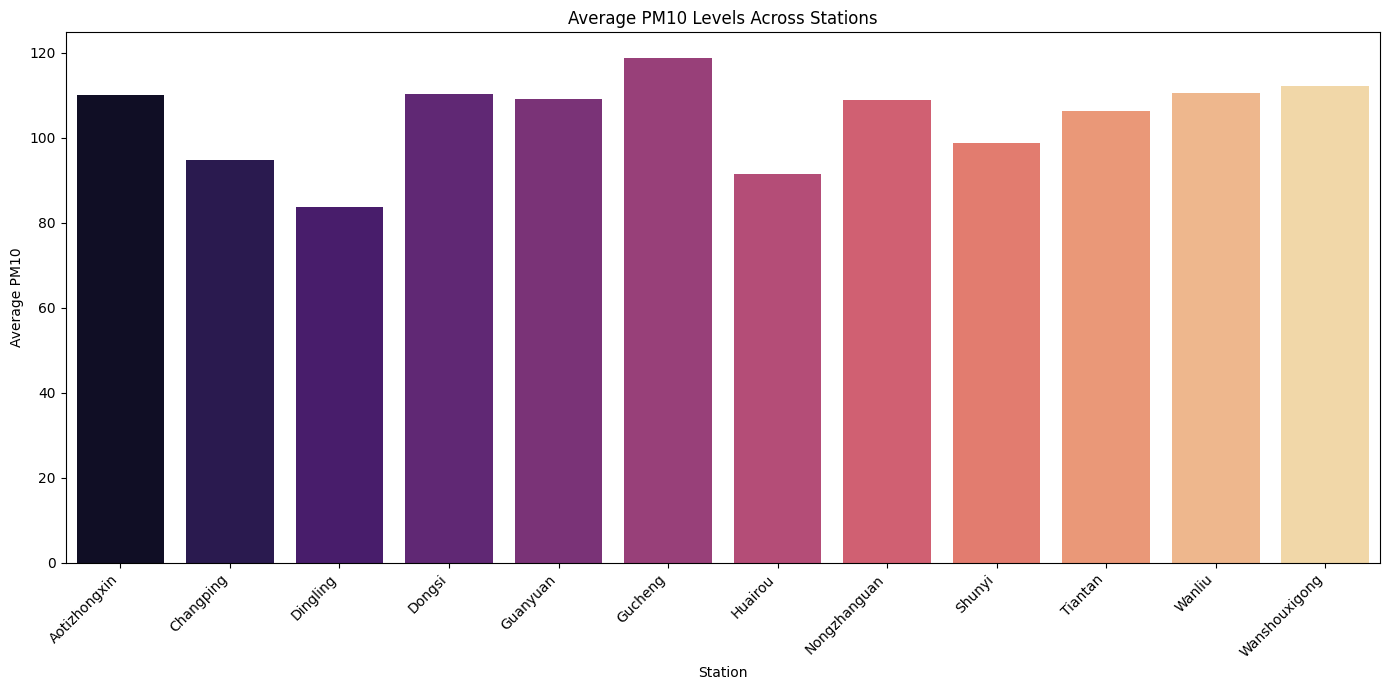

In [30]:
plt.figure(figsize=(14, 7))
sns.barplot(x='station', y='PM2.5', hue='station', data=avg_pollutant_levels_df, palette='viridis', legend=False)
plt.title('Average PM2.5 Levels Across Stations')
plt.xlabel('Station')
plt.ylabel('Average PM2.5')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(x='station', y='PM10', hue='station', data=avg_pollutant_levels_df, palette='magma', legend=False)
plt.title('Average PM10 Levels Across Stations')
plt.xlabel('Station')
plt.ylabel('Average PM10')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Ringkasan Analisis Data
### Temuan Utama

* Kejadian polusi tinggi didefinisikan sebagai PM2.5 > 100.

* Untuk setiap stasiun, tiga metrik RFM berhasil dihitung:

 Recency → jumlah hari sejak kejadian polusi tinggi terakhir

 Frequency → total jumlah kejadian polusi tinggi

Magnitude → rata-rata PM2.5 selama kejadian polusi tinggi

Contoh: stasiun Aotizhongxin memiliki recency 1 hari, frequency 9368 kejadian, dan rata-rata PM2.5 (magnitude) 181,14 selama kejadian tinggi.

* Tanggal referensi terbaru untuk perhitungan recency adalah 28 Februari 2017.

* Rata-rata tingkat PM2.5 dan PM10 dihitung untuk setiap stasiun. Diagram batang dibuat untuk membandingkan rata-rata polutan antar stasiun, sehingga hotspot polusi dapat diidentifikasi.

* Semua nilai RFM dan rata-rata polutan berhasil disimpan dalam DataFrame masing-masing dan divisualisasikan menggunakan diagram batang untuk menunjukkan variasi antar stasiun.

Insight dan Langkah Selanjutnya

* Analisis RFM dan perbandingan rata-rata polutan menunjukkan profil polusi berbeda di tiap stasiun, mengindikasikan kondisi lokal atau sumber polusi yang berbeda-beda.

Langkah berikutnya dapat meliputi:

* Segmentasi stasiun berdasarkan profil RFM dan rata-rata polutan.

* Mengembangkan strategi intervensi yang ditargetkan untuk stasiun yang menjadi hotspot polusi konsisten (misalnya: frequency tinggi, magnitude tinggi, rata-rata polutan tinggi).